In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne(adc_valon='/dev/ttyUSB0')

In [4]:
ri.initialize(use_config=False)

Reinitializing system
Deprogramming
Programming iq2xpfb14mcr7_2015_Nov_25_0907.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 513.0 MHz
starting udp server process on PPC
ssh root@roach "nohup /boffiles/udp/kid_ppc 3152 < /dev/null &> /dev/null &"


In [5]:
ri.set_fft_gain(2)

In [6]:
ri.set_lo(1200)

In [7]:
ri.set_dac_atten(63)

In [8]:
x,y = ri.get_raw_adc()

In [9]:
x.std()

18.193899778734366

In [10]:
x.ptp()

125.0

(0.0001, 0.1)

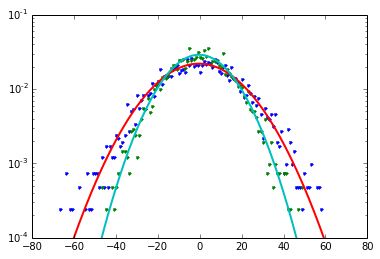

In [11]:
h,b = np.histogram(x,bins=np.arange(-80,80),normed=True)
h2,b = np.histogram(y,bins=np.arange(-80,80),normed=True)
semilogy(b[:-1],h,'.')
semilogy(b[:-1],h2,'.')

t = np.arange(-80,80)
plot(t,np.exp(-((t-x.mean())/(np.sqrt(2)*x.std()))**2)/np.sqrt(2*np.pi*x.std()**2),lw=2)
plot(t,np.exp(-((t-y.mean())/(np.sqrt(2)*y.std()))**2)/np.sqrt(2*np.pi*y.std()**2),lw=2)
ylim(1e-4,1e-1)

(-80.0, 60.0, -60.0, 60.0)

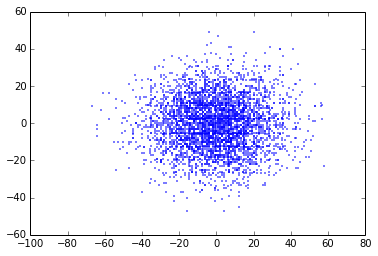

In [12]:
plot(x,y,'.',markersize=2)
axis('equal')

In [13]:
(x+1j*y).std()

22.853328439669529

In [14]:
(x+1j*y).mean()

(-0.4912109375-0.39306640625j)

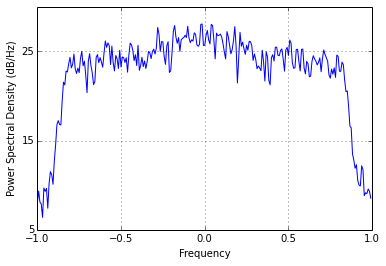

In [15]:
blah = psd(x+1j*y)

In [16]:
ri.set_tone_freqs(np.array([64])+ri.lo_frequency+256./2**17,nsamp=2**18)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1264.00195312])

In [17]:
ri.select_fft_bins([0])

In [18]:
d,addr = ri.get_data(8)

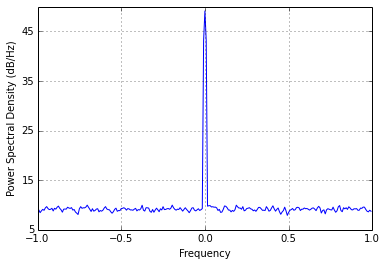

In [20]:
blah = psd(d[:,0])

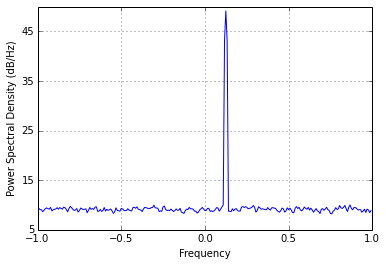

In [21]:
ri.set_dac_atten(63)
d,addr = ri.get_data(8,demod=False)
blah = psd(d[:,0])

In [22]:
import time

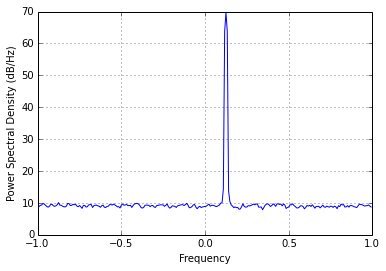

In [23]:
ri.set_dac_atten(30)
time.sleep(1)
d,addr = ri.get_data(8,demod=False)
blah = psd(d[:,0])

In [23]:
x,y = ri.get_raw_adc()

In [24]:
x.std()

26.559194974045667

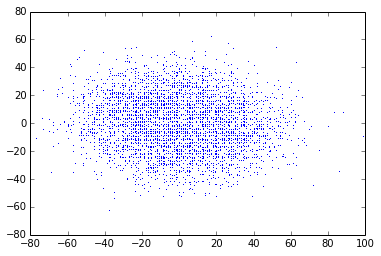

In [25]:
plot(x,y,',')

In [24]:
import kid_readout.utils.sweeps

In [75]:
frqs = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-16,16)+ri.lo_frequency+40,np.arange(-2,2)/64.+512./2**14/8,nsamp=2**18)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [26]:
ri.set_dac_atten(30)

In [76]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 25.0 50.0 75.0


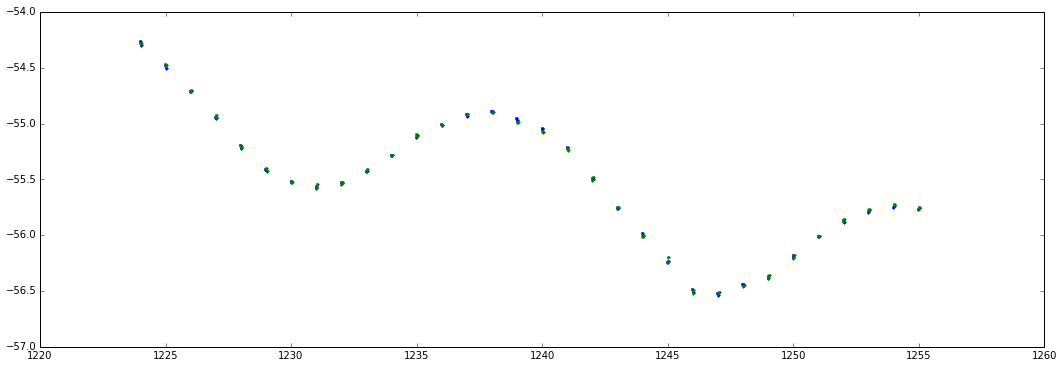

In [77]:
figure(figsize=(18,6))
plot(swp.freqs[::2],20*np.log10(np.abs(swp.data[::2])),'.')
plot(swp.freqs[1::2],20*np.log10(np.abs(swp.data[1::2])),'.')
#xlim(1246,1254)
#ylim(-60,-50)
#xlim(1224.8,1225.2)

In [29]:
blk = swp.blocks[0]

In [30]:
[blk.tone for blk in swp.blocks[:8]]

[12274, 12282, 12290, 12298, 12786, 12794, 12802, 12810]

In [31]:
[blk.fftbin for blk in swp.blocks[:8]]

[768, 769, 769, 770, 800, 801, 801, 802]

In [44]:
ri.select_bank(1)

In [72]:
ri.fft_bins

array([[ 767,  799,  831,  863,  895,  927,  959,  991, 1023, 1055, 1087,
        1119, 1151, 1183, 1215, 1247, 1279, 1311, 1343, 1375, 1407, 1439,
        1471, 1503, 1535, 1567, 1599, 1631, 1663, 1695, 1727, 1759],
       [ 765,  797,  829,  861,  893,  925,  957,  989, 1021, 1053, 1085,
        1117, 1149, 1181, 1213, 1245, 1277, 1309, 1341, 1373, 1405, 1437,
        1469, 1501, 1533, 1565, 1597, 1629, 1661, 1693, 1725, 1757],
       [ 768,  800,  832,  864,  896,  928,  960,  992, 1024, 1056, 1088,
        1120, 1152, 1184, 1216, 1248, 1280, 1312, 1344, 1376, 1408, 1440,
        1472, 1504, 1536, 1568, 1600, 1632, 1664, 1696, 1728, 1760],
       [ 769,  801,  833,  865,  897,  929,  961,  993, 1025, 1057, 1089,
        1121, 1153, 1185, 1217, 1249, 1281, 1313, 1345, 1377, 1409, 1441,
        1473, 1505, 1537, 1569, 1601, 1633, 1665, 1697, 1729, 1761]])

In [68]:
ri.fft_bins[1,:] = ri.fft_bins[1,:]-1

In [69]:
ri.select_fft_bins(range(32))

In [70]:
d,addr = ri.get_data(8)

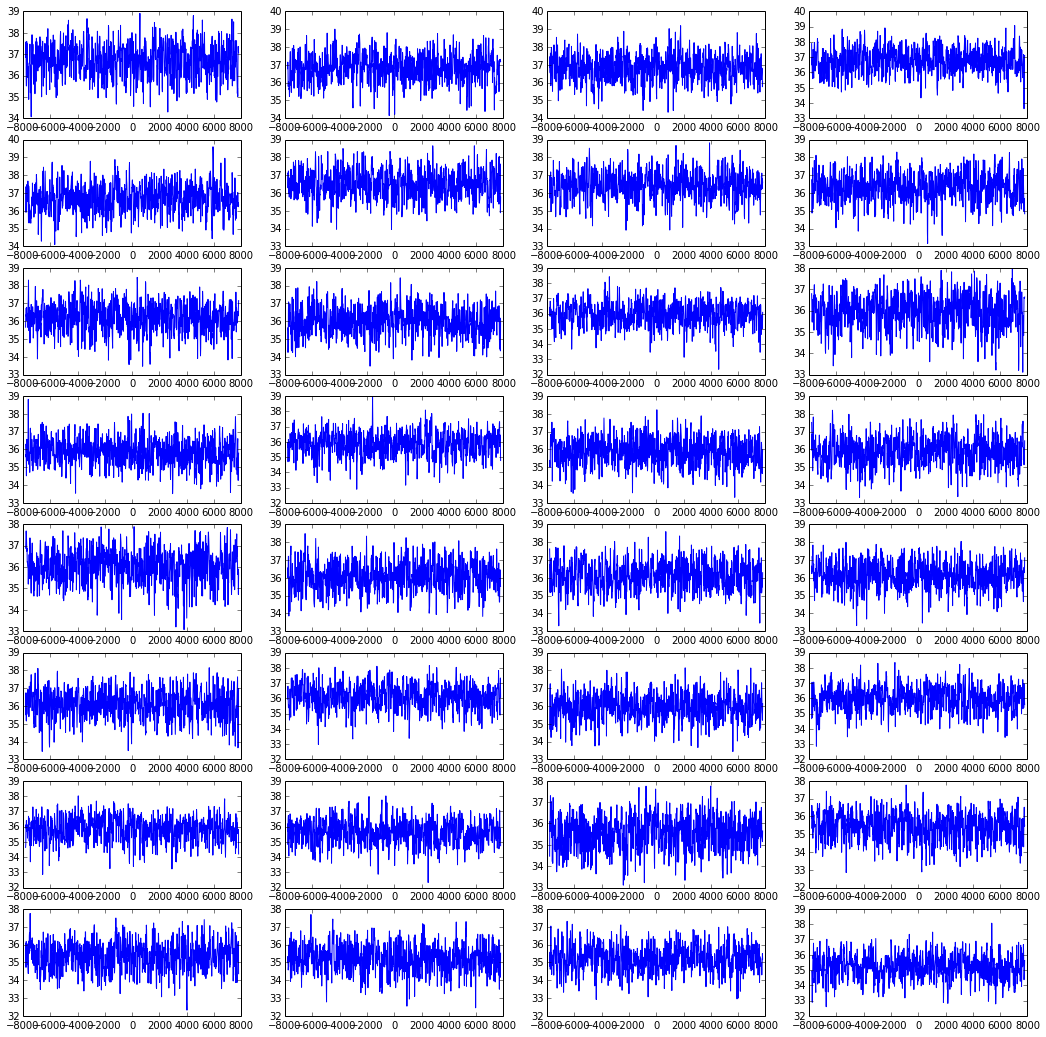

In [71]:
fig,axs=plt.subplots(8,4,figsize=(18,18))
for k in range(32):
    ax = axs.flatten()[k]
    pxx,fr = mlab.psd(d[:,k],Fs=256e6/2**14,NFFT=1024)
    ax.plot(fr,10*np.log10(pxx))

## Applying fix

In [15]:
ri.boffile = 'iq2xpfb14mcr7_2015_Nov_25_1102.bof'

In [16]:
ri.initialize(use_config=False)

Reinitializing system
Deprogramming
Programming iq2xpfb14mcr7_2015_Nov_25_1102.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 513.0 MHz
starting udp server process on PPC
ssh root@roach "nohup /boffiles/udp/kid_ppc 3049 < /dev/null &> /dev/null &"


In [17]:
ri.set_lo(1200)
ri.set_fft_gain(2)

In [18]:
ri.set_dac_atten(30)

In [19]:
ri.set_modulation_output(7)

122.0703125

In [20]:
frqs = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-16,16)+ri.lo_frequency+40,np.arange(-2,2)/64.+512./2**14/8,nsamp=2**18)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [21]:
swp2 = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 25.0 50.0 75.0


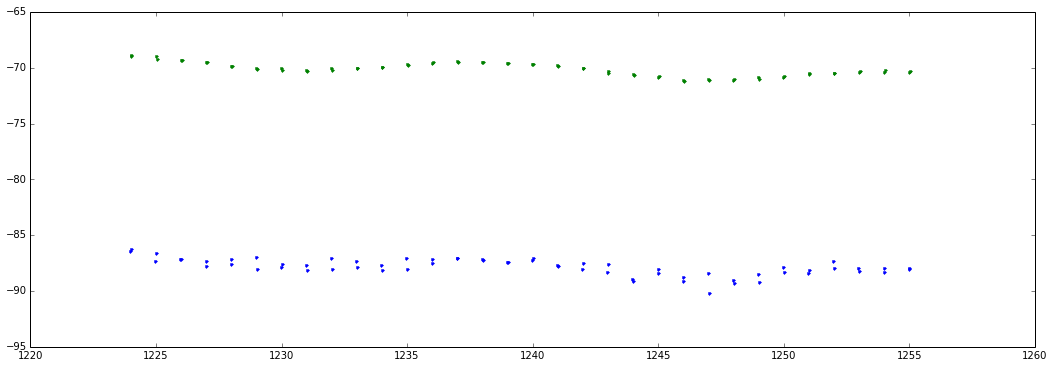

In [22]:
figure(figsize=(18,6))
plot(swp2.freqs[::2],20*np.log10(np.abs(swp2.data[::2])),'.')
plot(swp2.freqs[1::2],20*np.log10(np.abs(swp2.data[1::2])),'.')
#xlim(1246,1254)
#ylim(-60,-50)